In [122]:
#Stock Price prediction using Python and Artificial Recurrent Neural Network -Long short  Term Memory LSTM of a coorporation (Apple Inc)
#using Past 60 day stock price 

In [123]:
#Importing libraries
import math
import pandas_datareader as web 
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [124]:
#Get the code
df = web.DataReader('AAPL',data_source='yahoo',start= '2012-01-01',end='2019-12-17')
df
#Get the rows and columns in the dataset
df.shape

(2003, 6)

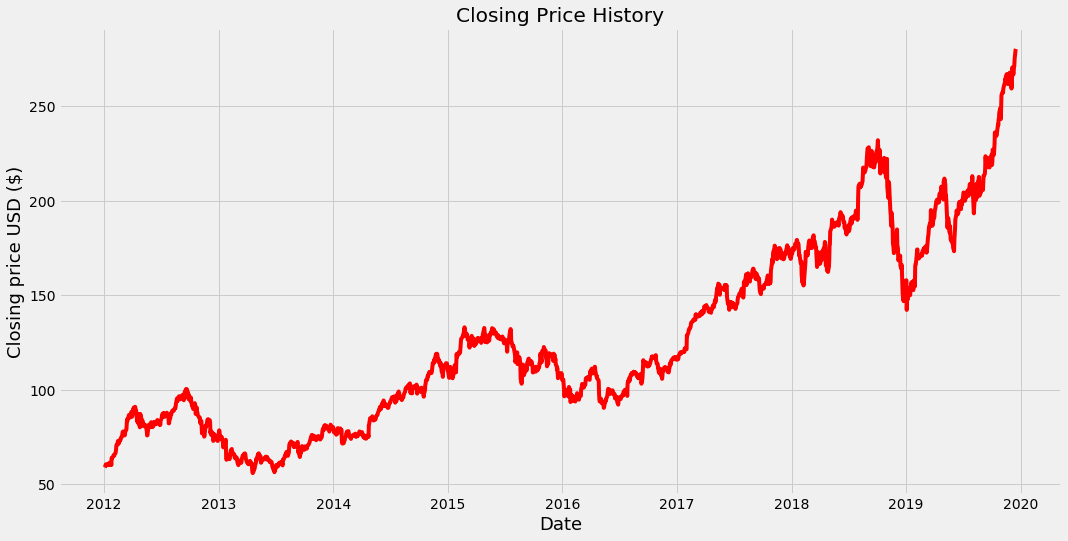

In [125]:
#Visulaize the closing price history
plt.figure(figsize=(16,8))
plt.title("Closing Price History")
plt.plot(df['Close'],color='red')
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Closing price USD ($)',fontsize = 18)
plt.show()

In [126]:
#Creating new df with only close column
data=df.filter(['Close'])
#Convert the data frame to numpy array
dataset = data.values
#Get the number of wors to train the model 
training_data_len = math.ceil(len(dataset)*0.8)
training_data_len
print(dataset)



[[ 58.74714279]
 [ 59.06285858]
 [ 59.71857071]
 ...
 [275.1499939 ]
 [279.85998535]
 [280.41000366]]


In [127]:
#Scaling the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)



In [128]:
#Create Training Dataset 
#scaled Trainig dataset
train_data = scaled_data[0:training_data_len,:]
#split the data into X_Train , Y_Train 
X_Train=[]
Y_Train = []

for i in range(60,len(train_data)):
    X_Train.append(train_data[i-60:i,0])
    X_Train
    Y_Train.append(train_data[i,0])
    if i <=61:
        print(X_Train)
        print(Y_Train)
        print()
        


[array([0.01316509, 0.01457064, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862193, 0.02173194,
       0.02453668, 0.02367172, 0.01893356, 0.02345548, 0.01900352,
       0.03569838, 0.03440731, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814046, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661397,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632775, 0.09835024, 0.10269405, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701233, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]

[array([0.01316509, 0.01457064, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862193, 0.02173194,
       0.02453668, 0.02367172, 0.01

In [129]:
#Convert the X_Train , Y_Train to numpy array
X_Train,Y_Train = np.array(X_Train),np.array(Y_Train)

In [130]:
#Reshape the X_Train Dataset 
X_Train = np.reshape(X_Train,(X_Train.shape[0],X_Train.shape[1],1))
X_Train.shape

(1543, 60, 1)

In [131]:
#BUILD THE LSTM MODEL 
model = Sequential()
model.add(LSTM(50,return_sequences = True, input_shape = (X_Train.shape[1],1)))
model.add(LSTM(50,return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [132]:
#Compile the model
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [133]:
#Train the model
model.fit(X_Train,Y_Train,batch_size = 1,epochs = 1)

Epoch 1/1
1543/1543 [==============================] - 55s 35ms/step - loss: 6.9523e-04


In [135]:
#Create the test dataset
#create new array containign scaled valued from index 1543 to 2003
#thats is 20% of data
test_data = scaled_data [training_data_len-60:2003,:]
#Create the datasets X_test,Y_test
X_test = []
Y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    X_test.append(test_data[i-60:i,0])




In [136]:
#Convert the data to numpy array
X_test = np.array(X_test)



In [137]:
#Reshape the data
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))



In [138]:
#Get the model's predicted price values
predictions = model.predict(X_test)
#reverse the values whihc shd be same as y_test dataset contains
predictions = scaler.inverse_transform(predictions)



In [147]:
#Evaluating the model 
#Get the root mean square (RMSE)
#the lower value of rmse shows how well our model performs
rmse = np.sqrt(np.mean((predictions-Y_test)**2))
rmse

13.956664258469065

C:\Users\18575\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


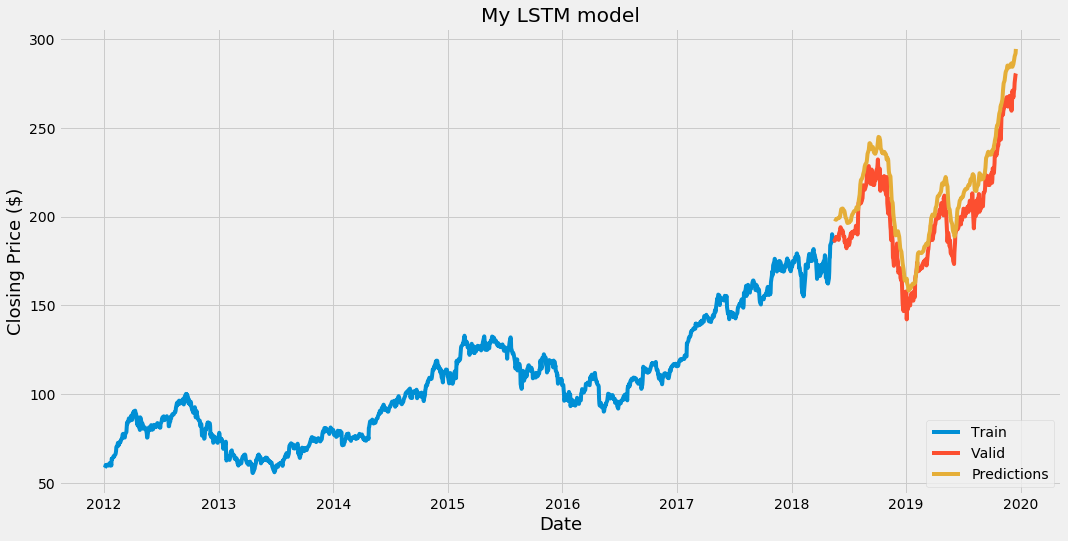

In [140]:
#plot the data 
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title("My LSTM model")
plt.xlabel("Date",fontsize = 18)
plt.ylabel("Closing Price ($)",fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Valid','Predictions'],loc = "lower right")
plt.show()

In [141]:
#show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-05-17,186.990005,198.781250
2018-05-18,186.309998,198.643478
2018-05-21,187.630005,198.307877
2018-05-22,187.160004,198.212128
2018-05-23,188.360001,198.155609
...,...,...
2019-12-11,270.769989,287.513306
2019-12-12,271.459991,288.732544
2019-12-13,275.149994,289.951904


In [145]:
#Get the closing price
apple_quote = web.DataReader('AAPL',data_source='yahoo',start = '2012-01-01',end = '2019-12-17')
#creating new data frame
new_df = apple_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the data frame to an array
last_60_days = new_df[-60:].values
#scale the data 
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
#convert x_test dataset to numpy array
X_test = np.array(X_test)
#reshape the data 
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#Predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)
                             

[[296.60974]]


In [146]:
apple_quote2 = web.DataReader('AAPL',data_source='yahoo',start = '2019-12-18',end = '2019-12-18')
print(apple_quote2['Close'])


Date
2019-12-18    279.73999
Name: Close, dtype: float64
